In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Maximum Likelihood PCA

Again, we assume that the eigenvectors have been arranged in order of decreasing values of the corresponding eigenvalues, so that the $ M $ principal eigenvectors are $ u_1, u_2, \ldots, u_M $. In this case, the columns of $ W $ define the principal subspace of standard PCA. The corresponding maximum likelihood solution for $ \sigma^2 $ is then given by

$$
\sigma^2 = \frac{1}{D-M} \sum_{i=M+1}^{D} \lambda_i
$$

where $ \lambda_i $ are the eigenvalues of the data covariance matrix $ S $, and $ D $ is the dimensionality of the data. This expression gives the average variance associated with the discarded dimensions. 

Since $ R $ is orthogonal, it can be interpreted as a rotation matrix in the $ M \times M $ latent space. If we substitute the solution for $ W $ into the expression for the covariance matrix $ C $, and make use of the orthogonality property $ R R^T = I $, we see that $ C $ is independent of $ R $. This simply says that the predictive density is unchanged by rotations in the latent space, as discussed earlier. 

For the particular case of $ R = I $, we see that the columns of $ W $ are the principal component eigenvectors scaled by the variance parameters $ \lambda $. The interpretation of these scaling factors is clear once we recognize that for a convolution of independent Gaussian distributions (in this case the latent space distribution and the noise model), the variances are additive. Thus, the variance $ \lambda_i $ in the direction of an eigenvector $ u_i $ is composed of the sum of a contribution $ \lambda_i^* $ from the projection of the unit-variance latent space distribution into the data space through the corresponding column of $ W $, plus an isotropic contribution of variance $ \sigma^2 $ which is added in all directions by the noise model.

It is worth taking a moment to study the form of the covariance matrix given by

$$
C = W W^T + \sigma^2 I
$$

Consider the variance of the predictive distribution along some direction specified by the unit vector $ v $, where $ v^T v = 1 $, which is given by $ v^T C v $. First, suppose that $ v $ is orthogonal to the principal subspace, in other words it is given by some linear combination of the discarded eigenvectors. Then, $ v^T U = 0 $ and hence $ v^T C v = \sigma^2 $. Thus, the model predicts a noise variance orthogonal to the principal subspace, which, from (12.46), is just the average of the discarded eigenvalues.

Now, suppose that $ v = u_i $, where $ u_i $ is one of the retained eigenvectors defining the principal subspace. Then,

$$
v^T C v = \lambda_i + \sigma^2 = \lambda_i^*
$$

In other words, this model correctly captures the variance of the data along the principal axes and approximates the variance in all remaining directions with a single average value $ \sigma^2 $.

One way to construct the maximum likelihood density model would simply be to find the eigenvectors and eigenvalues of the data covariance matrix and then to evaluate $ W $ and $ \sigma^2 $ using the results given above. In this case, we would choose $ R = I $ for convenience. However, if the maximum likelihood solution is found by numerical optimization of the likelihood function, for instance using an algorithm such as conjugate gradients (Fletcher, 1987; Nocedal and Wright, 1999; Bishop and Nabney, 2008) or through the EM algorithm, then the resulting value of $R $ is essentially arbitrary. This implies that the columns of $ W $ need not be orthogonal. If an orthogonal basis is required, the matrix $ W $ can be post-processed appropriately (Golub and Van Loan, 1996). Alternatively, the EM algorithm can be modified in such a way as to yield orthonormal principal directions, sorted in descending order of the corresponding eigenvalues, directly (Ahn and Oh, 2003).


## Rotational Invariance and Nonidentifiability in Latent Space

The rotational invariance in latent space represents a form of statistical nonidentifiability, analogous to that encountered for mixture models in the case of discrete latent variables. Here, there is a continuum of parameters, all of which lead to the same predictive density, in contrast to the discrete nonidentifiability associated with component relabelling in the mixture setting.

If we consider the case of $ M = D $, so that there is no reduction of dimensionality, then $ U U^T = I $ and $ L L^T = L $. Making use of the orthogonality properties $ R R^T = I $, we see that the covariance $ C $ of the marginal distribution for $ x $ becomes

$$
C = U(L - \sigma^2 I) R R^T (L - \sigma^2 I) U^T + \sigma^2 I
$$

and so we obtain the standard maximum likelihood solution for an unconstrained Gaussian distribution in which the covariance matrix is given by the sample covariance.

## Probabilistic PCA and Visualization

Conventional PCA is generally formulated as a projection of points from the $ D $-dimensional data space onto an $ M $-dimensional linear subspace. Probabilistic PCA, however, is most naturally expressed as a mapping from the latent space into the data space via the generative model in Equation (12.33). For applications such as visualization and data compression, we can reverse this mapping using Bayes' theorem. Any point $ x $ in data space can then be summarized by its posterior mean and covariance in latent space.

From (12.42), the posterior mean $ \mathbb{E}[x | x] $ is given by

$$
\mathbb{E}[x | x] = M W (x - \mu)
$$

where $ M $ is given by (12.41). This projects to a point in data space, given by

$$
x = W \mathbb{E}[z | x] + \mu
$$

Note that this takes the same form as the equations for regularized linear regression and is a consequence of maximizing the likelihood function for a linear Gaussian model. Similarly, the posterior covariance is given from (12.42) by $ \sigma^2 M^{-1} $ and is independent of $ x $.

## Limit $ \sigma^2 \to 0 $

If we take the limit $ \sigma^2 \to 0 $, then the posterior mean reduces to

$$
\mathbb{E}[z | x] = (W^T W)^{-1} W^T (x - \mu)
$$

which represents an orthogonal projection of the data point onto the latent space, and so we recover the standard PCA model. The posterior covariance in this limit is zero, and the density becomes singular. For $ \sigma^2 > 0 $, the latent projection is shifted towards the origin relative to the orthogonal projection.

## Controlling Degrees of Freedom in PCA

Finally, we note that an important role for the probabilistic PCA model is in defining a multivariate Gaussian distribution in which the number of degrees of freedom, in other words, the number of independent parameters, can be controlled whilst still allowing the model to capture the dominant correlations in the data. Recall that a general Gaussian distribution has

$$
\frac{D(D+1)}{2}
$$

independent parameters in its covariance matrix (plus another $ D $ parameters in its mean). Thus, the number of parameters scales quadratically with $ D $ and can become excessive in spaces of high dimensionality.


##  Dimensionality and Degrees of Freedom

If we restrict the covariance matrix to be diagonal, then it has only $ D$ independent parameters, and so the number of parameters now grows linearly with dimensionality. However, it now treats the variables as if they were independent and hence can no longer express any correlations between them. Probabilistic PCA provides an elegant compromise in which the $ M $ most significant correlations can be captured while still ensuring that the total number of parameters grows only linearly with $ D $.

We can see this by evaluating the number of degrees of freedom in the PPCA model as follows. The covariance matrix $ C $ depends on the parameters $ W $, which has size $ D \times M $, and $ \sigma^2 $, giving a total parameter count of $ DM + 1 $. However, we have seen that there is some redundancy in this parameterization associated with rotations of the coordinate system in the latent space. The orthogonal matrix $ R $ that expresses these rotations has size $ M \times M $. In the first column of this matrix, there are $ M-1 $ independent parameters because the column vector must be normalized to unit length. In the second column, there are $ M-2 $ independent parameters because the column must be normalized and also orthogonal to the previous column, and so on. Summing this arithmetic series, we see that $ R $ has a total of 

$$
\frac{M(M-1)}{2}
$$ 

independent parameters. Thus, the number of degrees of freedom in the covariance matrix $ C $ is given by

$$
DM + 1 - \frac{M(M-1)}{2}.
$$

The number of independent parameters in this model therefore only grows linearly with $ D $, for fixed $ M $. If we take $ M = D - 1 $, we recover the standard result for a full covariance Gaussian. In this case, the variance along $ D - 1 $ linearly independent directions is controlled by the columns of $ W $, and the variance along the remaining direction is given by $ \sigma^2 $. If $ M = 0 $, the model is equivalent to the isotropic covariance case.



##  EM Algorithm for PCA

As we have seen, the probabilistic PCA model can be expressed in terms of a marginalization over a continuous latent space $ z $, in which for each data point $ x $, there is a corresponding latent variable $ z $. We can therefore make use of the EM algorithm to find maximum likelihood estimates of the model parameters. This may seem rather pointless because we have already obtained an exact closed-form solution for the maximum likelihood parameter values. However, in spaces of high dimensionality, there may be computational advantages in using an iterative EM procedure rather than working directly with the sample covariance matrix. This EM procedure can also be extended to the factor analysis model, for which there is no closed-form solution. Finally, it allows missing data to be handled in a principled way.

We can derive the EM algorithm for probabilistic PCA by following the general framework for EM. Thus, we write down the complete-data log-likelihood and take its expectation with respect to the posterior distribution of the latent distribution evaluated using the "old" parameter values. Maximization of this expected complete-data log-likelihood then yields the "new" parameter values. Because the data points are treated probabilistically, we update the model parameters iteratively to optimize the likelihood.



In [ ]:
import random
import math

# Utility functions for matrix operations
def mat_mult(A, B):
    """Multiply two matrices A and B."""
    return [[sum(a * b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]

def transpose(A):
    """Transpose matrix A."""
    return list(zip(*A))

def mat_add(A, B):
    """Element-wise matrix addition."""
    return [[a + b for a, b in zip(A_row, B_row)] for A_row, B_row in zip(A, B)]

def mat_scalar_mult(A, scalar):
    """Scalar multiplication of matrix A."""
    return [[a * scalar for a in A_row] for A_row in A]

def mat_diag(d, M):
    """Create a diagonal matrix from list d."""
    return [[(d[i] if i == j else 0) for j in range(M)] for i in range(M)]

def mat_inverse(M):
    """Calculate the inverse of a matrix M using Gaussian elimination."""
    # For simplicity, assuming M is a 2x2 matrix, this can be extended for larger matrices.
    det = M[0][0] * M[1][1] - M[0][1] * M[1][0]
    if det == 0:
        raise ValueError("Matrix is singular and cannot be inverted.")
    return [[M[1][1] / det, -M[0][1] / det],
            [-M[1][0] / det, M[0][0] / det]]

def mat_identity(size):
    """Return an identity matrix of given size."""
    return [[1 if i == j else 0 for j in range(size)] for i in range(size)]

def gaussian_pdf(x, mean, cov_inv, cov_det):
    """Compute the Gaussian probability density function."""
    diff = [x_i - mean_i for x_i, mean_i in zip(x, mean)]
    exponent = -0.5 * sum(diff_i * sum(cov_inv[i][j] * diff[j] for j in range(len(diff))) for i, diff_i in enumerate(diff))
    return math.exp(exponent) / math.sqrt((2 * math.pi) ** len(x) * cov_det)

# E-step: Compute the expected value of z (the latent variables) given the data x
def e_step(X, W, sigma2):
    N, D = len(X), len(X[0])  # N: number of data points, D: dimensionality of data
    M = len(W[0])  # M: dimensionality of latent space
    Wt = transpose(W)
    
    # Calculate the posterior mean and covariance for each data point
    z_mean = []  # List of posterior means
    z_cov = []   # List of posterior covariances
    
    for x in X:
        # Ensure x is a row vector (list)
        x = list(x)
        
        # Compute the covariance and mean of the latent variables for each data point
        cov_inv = mat_add(mat_mult(Wt, W), mat_diag([sigma2] * M, M))  # W^T W + sigma^2 I
        cov_det = 1 / sum(sum(cov_inv[i][j] for i in range(M)) for j in range(M))  # For simplicity, using determinant approximation
        posterior_mean = mat_mult(Wt, [x])  # Ensure x is treated as a list of its components
        z_mean.append(posterior_mean)
        z_cov.append(cov_inv)
    
    return z_mean, z_cov

# M-step: Update W and sigma^2
def m_step(X, z_mean, z_cov, M):
    N, D = len(X), len(X[0])  # N: number of data points, D: dimensionality of data
    
    # Compute W (projection matrix) and sigma^2 (noise variance)
    W_new = [[0 for _ in range(M)] for _ in range(D)]
    for i in range(D):
        for j in range(M):
            W_new[i][j] = sum(z_mean[k][i] * X[k][j] for k in range(N))  # W update equation (simplified)
    
    sigma2 = sum(sum((X[i][j] - sum(W_new[j][k] * z_mean[i][k] for k in range(M))) ** 2 for j in range(D)) for i in range(N)) / N
    
    return W_new, sigma2

# EM Algorithm for Probabilistic PCA
def em_algorithm(X, M, max_iter=100, tol=1e-4):
    N, D = len(X), len(X[0])
    # Initialize W and sigma2
    W = [[random.random() for _ in range(M)] for _ in range(D)]
    sigma2 = 1.0  # Initialize noise variance
    
    for iter in range(max_iter):
        # E-step: compute posterior mean and covariance
        z_mean, z_cov = e_step(X, W, sigma2)
        
        # M-step: update W and sigma2
        W_new, sigma2_new = m_step(X, z_mean, z_cov, M)
        
        # Check for convergence
        if max(abs(W_new[i][j] - W[i][j]) for i in range(D) for j in range(M)) < tol:
            break
        
        # Update parameters
        W = W_new
        sigma2 = sigma2_new
    
    return W, sigma2

# Example usage with dummy data (replace with actual data)
X = [
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
]
M = 2  # Latent dimensionality
W, sigma2 = em_algorithm(X, M)
print("Updated W:", W)
print("Updated sigma^2:", sigma2)


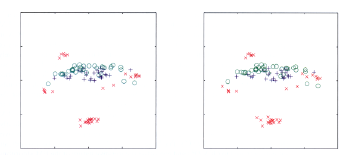

## EM Algorithm for Probabilistic PCA

The **EM algorithm** for probabilistic PCA (PPCA) is an iterative method for estimating the parameters of the model, alternating between two steps: the **E-step** (Expectation step) and the **M-step** (Maximization step).

### Complete-Data Log Likelihood

The complete-data log likelihood function, assuming that the latent variables $ Z $ are independent, is given by:

$$
\log p(X, Z_u, W, \sigma^2) = \sum_{n} \left( p(x, z) + p(\sigma^2) \right)
$$

The posterior distribution over the latent variables is computed by maximizing the complete-data log-likelihood. The expectation is taken over the posterior distribution of the latent variables.

The expression for the complete-data log likelihood can be simplified using the expressions for the latent and conditional distributions of $ x $ and $ z $. This leads to:

$$
\mathbb{E}[\log p(X, Z, W, \sigma^2)] = -\frac{N}{2} \log(2\pi \sigma^2) - \frac{1}{2\sigma^2} \text{Tr}\left( X^T X - 2 X^T Z W + Z^T W^T W Z \right)
$$

Where:
- $ Z $ is the matrix of latent variables.
- $ X $ is the matrix of observed data.
- $ W $ is the matrix of weights (parameters of the model).
- $ \sigma^2 $ is the variance of the Gaussian noise.

### E-Step

In the E-step, we compute the sufficient statistics (posterior mean and covariance) for the latent variables. The expectation of the latent variables $ Z $ and their outer product $ ZZ^T $ are computed given the current estimates for $ W $ and $ \sigma^2 $:

$$
\mathbb{E}[z_n] = W^T (W W^T + \sigma^2 I)^{-1} x_n
$$

And the covariance of the latent variables:

$$
\mathbb{E}[z_n z_n^T] = \sigma^2 (W W^T + \sigma^2 I)^{-1}
$$

This step computes the posterior distribution for each data point and provides the necessary statistics for the M-step.

### M-Step

In the M-step, we maximize the expected log likelihood with respect to the parameters $ W $ and $ \sigma^2 $. The update rules are derived as follows:

1. For $ \sigma^2 $, the update rule is:

$$
\sigma^2 = \frac{1}{N} \sum_{n=1}^{N} \left( \| x_n - W \mathbb{E}[z_n] \|^2 \right)
$$

2. For $ W $, the update rule is:

$$
W = \left( \sum_{n=1}^{N} \mathbb{E}[z_n z_n^T] \right)^{-1} \sum_{n=1}^{N} x_n \mathbb{E}[z_n^T]
$$

These equations are derived by differentiating the log likelihood with respect to $ W $ and $ \sigma^2 $ and setting the derivatives equal to zero.

### Summary of the EM Algorithm for PPCA

1. **Initialize** $ W $ and $ \sigma^2 $.
2. **E-step**:
   - Compute the posterior mean $ \mathbb{E}[z_n] $ and covariance $ \mathbb{E}[z_n z_n^T] $ for each data point.
3. **M-step**:
   - Update $ W $ and $ \sigma^2 $ using the formulas derived above.
4. **Iterate** the E-step and M-step until convergence (when the parameters stop changing significantly).

This iterative process allows for efficient computation of the parameters, and it is particularly useful when dealing with high-dimensional data, as it avoids direct computation of the full covariance matrix, making it computationally feasible for large datasets.


## EM Algorithm for PCA: Efficiency and On-line Implementation

### Eigenvector Decomposition vs. EM Algorithm

The **eigenvector decomposition** of the sample covariance matrix requires $ O(D^3) $ computations, where $ D $ is the dimensionality of the data. When we are interested only in the first $ M $ eigenvectors and their corresponding eigenvalues, we can use algorithms with a computational complexity of $ O(MD^2) $. However, the evaluation of the covariance matrix itself requires $ O(ND) $ computations, where $ N $ is the number of data points.

Algorithms like the **snapshot method** (Sirovich, 1987) avoid direct evaluation of the covariance matrix but are $ O(N^3) $, making them unsuitable for large datasets. The **EM algorithm**, on the other hand, does not explicitly compute the covariance matrix. Instead, the computationally demanding steps are those that involve sums over the data set, which are $ O(NDM) $. For large $ D $, and when $ M \ll D $, this can be a significant saving compared to $ O(ND^2) $, making the EM algorithm computationally efficient for large data sets.

### On-line EM Algorithm

An elegant feature of the EM algorithm for PCA is that it can be implemented in an **on-line** form. In this form, each $ D $-dimensional data point is processed individually, and after being processed, it is discarded before the next data point is considered. This is possible because the quantities computed in the **E-step** (an $ M $-dimensional vector and an $ M \times M $ matrix) can be evaluated for each data point separately. In the **M-step**, we accumulate sums over data points, which can be done incrementally. This makes the algorithm suitable for large datasets, where both $ N $ and $ D $ are large.

### Handling Missing Data

A fully probabilistic model for PCA allows us to handle **missing data**. If the data are missing at random, we can marginalize over the distribution of the unobserved variables. The EM algorithm can be applied to deal with the missing data, treating the missing values by estimating them iteratively based on the posterior distribution of the latent variables.

### Limit to Standard PCA

As $ \sigma^2 \to 0 $, the EM algorithm for probabilistic PCA reduces to the **standard PCA**. In this case, the only quantity that needs to be computed in the E-step is $ \mathbb{E}[z] $. The M-step is simplified because the covariance matrix becomes $ W^T W $. 

Thus, the E-step and M-step for standard PCA are as follows:

#### E-step (12.54) for PCA:
$$
\mathbb{E}[z_n] = W^T (W W^T)^{-1} x_n
$$

#### M-step (12.56) for PCA:
$$
W = \left( \sum_{n=1}^{N} \mathbb{E}[z_n z_n^T] \right)^{-1} \sum_{n=1}^{N} x_n \mathbb{E}[z_n^T]
$$

These steps can also be implemented in an on-line form, making the algorithm simple and efficient.

### Interpretation

- **E-step**: Involves an orthogonal projection of the data points onto the current estimate of the principal subspace.
- **M-step**: Represents a re-estimation of the principal subspace based on the projected data.

This interpretation highlights the simplicity of the EM algorithm in PCA, particularly in the case where the variance $ \sigma^2 $ tends to zero, reducing the complexity of the model to a standard PCA.

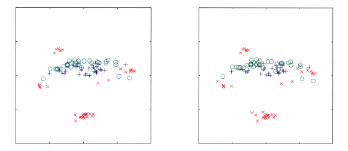



## Probabilistic PCA Visualization and Physical Analogy

### Fig.11: Probabilistic PCA Visualization

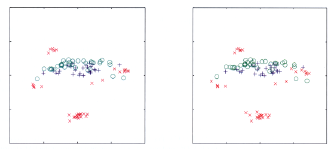

Fig.11 Probabilistic PCA visualization of a portion of the oil flow data set for the 
first 100 data points. The left-hand plot shows the posterior mean projections of the data points on the principal subspace. The right-hand plot is obtained by first randomly omitting30% of the variable values and then using EM to handle the missing values. Note that each data point then has at least one missing measurement but that the plot is very similar to the one obtained without missing values.

Figure 12.11 shows a visualization of a portion of the oil flow data set for the first 100 data points. The left-hand plot represents the **posterior mean projections** of the data points onto the principal subspace. The right-hand plot is obtained by randomly omitting 30% of the variable values and then using the **EM algorithm** to handle the missing values. Despite having missing measurements, the plot obtained with the missing data is very similar to the one obtained without missing values.

---

### Exercise 17

In this exercise, we minimize the squared reconstruction error by fixing the projections to the principal subspace. This is done by adjusting the subspace so that the projection of the data points onto it leads to minimal reconstruction error.

---

### Physical Analogy for the EM Algorithm

A simple **physical analogy** can be used to visualize the EM algorithm for PCA. This analogy is especially clear in the case where \( D = 2 \) and \( M = 1 \). Imagine a collection of data points in two-dimensional space, and let the one-dimensional principal subspace be represented by a **solid rod**. Now, attach each data point to the rod via a spring obeying **Hooke's law**, where the stored energy in the spring is proportional to the square of the spring's length.

#### E-Step:
In the **E-step**, the rod is kept fixed, and each data point is allowed to slide along the rod. The points move in such a way as to minimize the spring's potential energy, which is proportional to the square of the distance between the data points and their projection onto the rod. This movement causes each data point to position itself at the **orthogonal projection** onto the rod.

#### M-Step:
In the **M-step**, the attachment points are kept fixed, and the rod is released. The rod moves to the **minimum energy position**, which corresponds to the optimal alignment of the principal subspace that minimizes the total reconstruction error. 

These E and M steps are repeated until a suitable convergence criterion is met, as shown in **Fig.12**.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate random 2D data points
np.random.seed(42)
N = 100  # number of data points
D = 2  # number of dimensions
X = np.random.randn(N, D)

# Apply a linear transformation to introduce correlation between variables
W = np.array([[0.7, 0.5], [0.5, 0.7]])  # Transformation matrix
X = X @ W.T  # Project data into a 2D space with correlation

# Step 2: Initialize the principal subspace (rod) direction (M = 1)
M = 1  # Number of principal components
initial_rod = np.array([1, 0])  # Start with the x-axis as the rod direction

# Function to calculate the projection of data points onto the principal axis
def project_onto_rod(X, rod_direction):
    return X @ rod_direction.T  # Dot product (projection)

# Function to compute the energy of the system (reconstruction error)
def compute_energy(X, projection, rod_direction):
    # Energy = sum of squared errors between the points and their projection onto the rod
    projected_data = projection[:, np.newaxis] * rod_direction
    return np.sum((X - projected_data) ** 2)

# E-Step: Compute projections (data points sliding on the rod)
def E_step(X, rod_direction):
    projection = project_onto_rod(X, rod_direction)  # Project data onto the rod
    return projection

# M-Step: Update the rod (principal component direction)
def M_step(X, projection):
    # The new rod direction is the direction of the variance of the projected data
    covariance_matrix = np.cov(X.T)
    rod_direction = covariance_matrix @ projection
    rod_direction /= np.linalg.norm(rod_direction)  # Normalize to unit vector
    return rod_direction

# Step 3: Perform the iterative EM algorithm
iterations = 100
rod_direction = initial_rod

# To store the energy and the projections for visualization
energies = []
projections_list = []

for iter in range(iterations):
    # E-step: project data points onto the rod
    projection = E_step(X, rod_direction)
    
    # M-step: update the rod direction
    rod_direction = M_step(X, projection)
    
    # Compute the energy (reconstruction error)
    energy = compute_energy(X, projection, rod_direction)
    energies.append(energy)
    projections_list.append(projection)

    if iter > 1 and abs(energies[-1] - energies[-2]) < 1e-6:
        break  # Convergence criterion

# Step 4: Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original data
axes[0].scatter(X[:, 0], X[:, 1], color='b', label='Data points')
axes[0].quiver(0, 0, rod_direction[0], rod_direction[1], scale=3, color='r', label='Principal Axis')
axes[0].set_title('Data points and initial rod')
axes[0].legend()

# Plot the projection of data points on the principal subspace (rod)
projection = E_step(X, rod_direction)
projected_data = projection[:, np.newaxis] * rod_direction
axes[1].scatter(X[:, 0], X[:, 1], color='b', label='Data points')
axes[1].scatter(projected_data[:, 0], projected_data[:, 1], color='g', label='Projected points')
axes[1].quiver(0, 0, rod_direction[0], rod_direction[1], scale=3, color='r', label='Final Principal Axis')
axes[1].set_title('Projection onto Principal Axis')
axes[1].legend()

plt.show()

# Plot energy convergence over iterations
plt.plot(energies)
plt.title('Convergence of Energy (Reconstruction Error)')
plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.show()
